## Install and Import Dependencies

In [23]:
#List of imports and librabaries used
import pandas as pd
import numpy as np
import seaborn as sns
import graphviz
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.lines import Line2D
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix, precision_recall_curve, roc_curve, auc, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, GradientBoostingRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, plot_confusion_matrix, roc_curve, auc, f1_score, recall_score, precision_score, confusion_matrix, mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib.legend_handler import HandlerLine2D
import xgboost
import statsmodels.api as sm

# Load Dataset

In [2]:
# Read data from prepared Data file
df = pd.read_csv('df.csv')

 # 0. Data Prepation

In [3]:
# All data preperation can be seen in the data preperation for algorithm notebook. 
default = df
df

,Expenditure_Category,Employment_Status,Year,Socio_economic_classification,Household_Composition,Disposable_income_decile_group,Tenure,Regions,Expenditure
0,5,1,2016,4,1,6,7,2,26.083333
1,12,6,2018,7,13,9,4,12,43.533333
2,13,3,2018,9,9,5,7,4,63.133333
3,6,1,2018,7,6,7,3,1,5.216667
4,12,2,2019,8,11,10,2,7,55.516667
...,...,...,...,...,...,...,...,...,...
46842,5,2,2019,11,7,3,3,4,27.716667
46843,10,2,2019,11,4,5,4,9,5.801667
46844,13,6,2019,8,8,6,6,8,58.300000
46845,11,1,2018,5,6,1,6,10,48.583333


# 1. Data Exploration

In [4]:
# Getting info of values in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46847 entries, 0 to 46846
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Expenditure_Category            46847 non-null  int64  
 1   Employment_Status               46847 non-null  int64  
 2   Year                            46847 non-null  int64  
 3   Socio_economic_classification   46847 non-null  int64  
 4   Household_Composition           46847 non-null  int64  
 5   Disposable_income_decile_group  46847 non-null  int64  
 6   Tenure                          46847 non-null  int64  
 7   Regions                         46847 non-null  int64  
 8   Expenditure                     46847 non-null  float64
dtypes: float64(1), int64(8)
memory usage: 3.2 MB


In [5]:
df.describe()

,Expenditure_Category,Employment_Status,Year,Socio_economic_classification,Household_Composition,Disposable_income_decile_group,Tenure,Regions,Expenditure
count,46847.000000,46847.000000,46847.000000,46847.000000,46847.000000,46847.000000,46847.000000,46847.000000,46847.000000
mean,7.034495,3.494333,2017.996008,6.005827,6.997716,5.497961,4.022072,6.495400,41.672337
std,3.753096,1.704911,1.416101,3.161553,3.729144,2.875245,1.995422,3.451634,26.931566
min,1.000000,1.000000,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.633333
25%,4.000000,2.000000,2017.000000,3.000000,4.000000,3.000000,2.000000,4.000000,16.550000
50%,7.000000,3.000000,2018.000000,6.000000,7.000000,5.000000,4.000000,6.000000,39.816667
75%,10.000000,5.000000,2019.000000,9.000000,10.000000,8.000000,6.000000,10.000000,62.916667
max,13.000000,6.000000,2020.000000,11.000000,13.000000,10.000000,7.000000,12.000000,152.566667


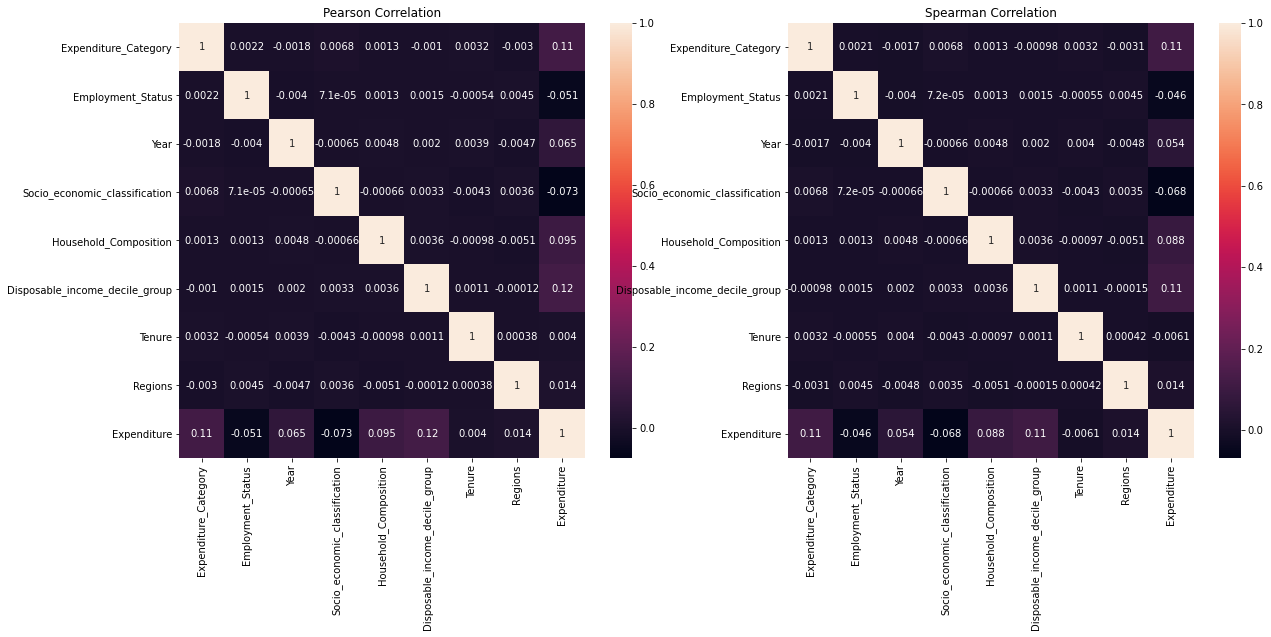

In [6]:
#Visualising the data with Pearson's and Spearman's Correlation Coefficent 
# this was done to find columns (independent variables) in the dataset which affect the expenditure (dependent variable)

plt.figure(figsize=(20, 8)) 
plt.subplot(1, 2, 1)
corr = df.corr(method = 'pearson')
sns.heatmap(corr, annot = True)
plt.title("Pearson Correlation")

plt.subplot(1, 2, 2)
corr = df.corr(method = 'spearman')
sns.heatmap(corr, annot = True)
plt.title("Spearman Correlation")
plt.show()

# 2. Create the dependent and independent variables 

In [7]:
# independent variable (all columns except expenditure)
x = df.iloc[:,0:8].values 

# dependent variable (Expenditure)
y = df.iloc[:,8:].values

In [8]:
x

array([[   5,    1, 2016, ...,    6,    7,    2],
       [  12,    6, 2018, ...,    9,    4,   12],
       [  13,    3, 2018, ...,    5,    7,    4],
       ...,
       [  13,    6, 2019, ...,    6,    6,    8],
       [  11,    1, 2018, ...,    1,    6,   10],
       [  12,    2, 2020, ...,    6,    1,    1]])

In [9]:
y

array([[26.08333333],
       [43.53333333],
       [63.13333333],
       ...,
       [58.3       ],
       [48.58333333],
       [34.56666667]])

# 3. Building model using all features

In [10]:
# the sklearn library had divided the dataset into train and test datasets
# train will be used to train the mode, using the datasets to form the relationships 
# test data will be used to test how well the model has been trained
# x was the independent variable and y was the dependent variable 
# test size is 20%
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5, random_state=0)

In [11]:
x_train.shape

(23423, 8)

In [12]:
x_test.shape

(23424, 8)

In [13]:
y_train.shape

(23423, 1)

In [14]:
y_test.shape

(23424, 1)

In [15]:
regression = LinearRegression()

In [16]:
regression.fit(x_train,y_train)

LinearRegression()

In [17]:
y_predict = regression.predict(x_test)

## 3.1 The values gotten from the prediction do not accurately coinside with the test data

In [18]:
y_predict[4]

array([28.46432729])

In [19]:
y_test[4]

array([15.6])

In [20]:
# RMSE:
rmse = mean_squared_error(y_predict, y_test) ** 0.5

rmse
#Get the confusion matrix
#confusion_matrix(y_test, y_predict)

26.17538720164615

# 4. Regression Models using statsmodels Library

In [21]:
import statsmodels.api as sm

## 4.1 OLS Model

In [24]:
# train OLS model
model = sm.OLS(y_train, x_train)
result = model.fit()

print(result.summary())

predict = result.predict(x_test)
print('R2 Score: ', r2_score(y_test,predict))
print('mean absolute error:', mean_absolute_error(y_test,predict))
print('mean squared error: ', mean_squared_error(y_test,predict))

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.717
Model:                            OLS   Adj. R-squared (uncentered):              0.717
Method:                 Least Squares   F-statistic:                              7411.
Date:                Sun, 01 May 2022   Prob (F-statistic):                        0.00
Time:                        19:19:01   Log-Likelihood:                     -1.0993e+05
No. Observations:               23423   AIC:                                  2.199e+05
Df Residuals:                   23415   BIC:                                  2.199e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 4.2 GLS Model

In [25]:
# train GLS model
model = sm.GLS(y_train, x_train)
result = model.fit()

print(result.summary())

predict = result.predict(x_test)
print('R2 Score: ', r2_score(y_test,predict))
print('mean absolute error:', mean_absolute_error(y_test,predict))
print('mean squared error: ', mean_squared_error(y_test,predict))

                                 GLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.717
Model:                            GLS   Adj. R-squared (uncentered):              0.717
Method:                 Least Squares   F-statistic:                              7411.
Date:                Sun, 01 May 2022   Prob (F-statistic):                        0.00
Time:                        19:19:06   Log-Likelihood:                     -1.0993e+05
No. Observations:               23423   AIC:                                  2.199e+05
Df Residuals:                   23415   BIC:                                  2.199e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 4.3 WLS Model

In [26]:
# train WLS model
model = sm.WLS(y_train, x_train)
result = model.fit()

print(result.summary())

predict = result.predict(x_test)
print('R2 Score: ', r2_score(y_test,predict))
print('mean absolute error:', mean_absolute_error(y_test,predict))
print('mean squared error: ', mean_squared_error(y_test,predict))

                                 WLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.717
Model:                            WLS   Adj. R-squared (uncentered):              0.717
Method:                 Least Squares   F-statistic:                              7411.
Date:                Sun, 01 May 2022   Prob (F-statistic):                        0.00
Time:                        19:19:18   Log-Likelihood:                     -1.0993e+05
No. Observations:               23423   AIC:                                  2.199e+05
Df Residuals:                   23415   BIC:                                  2.199e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 4.4 GLSAR Model

In [28]:
# train GLSAR model
model = sm.GLSAR(y_train, x_train)
result = model.fit()

print(result.summary())

predict = result.predict(x_test)
print('R2 Score: ', r2_score(y_test,predict))
print('mean absolute error:', mean_absolute_error(y_test,predict))
print('mean squared error: ', mean_squared_error(y_test,predict))

                                GLSAR Regression Results                               
Dep. Variable:                      y   R-squared (uncentered):                   0.717
Model:                          GLSAR   Adj. R-squared (uncentered):              0.717
Method:                 Least Squares   F-statistic:                              7410.
Date:                Sun, 01 May 2022   Prob (F-statistic):                        0.00
Time:                        19:19:35   Log-Likelihood:                     -1.0993e+05
No. Observations:               23422   AIC:                                  2.199e+05
Df Residuals:                   23414   BIC:                                  2.199e+05
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

## 4.5 QuantReg Model

In [29]:
# train Ordinary Least Squares model
model = sm.QuantReg(y_train, x_train)
result = model.fit()

print(result.summary())
predict = result.predict(x_test)
print('R2 Score: ', r2_score(y_test,predict))
print('mean absolute error:', mean_absolute_error(y_test,predict))
print('mean squared error: ', mean_squared_error(y_test,predict))

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.04634
Model:                       QuantReg   Bandwidth:                       4.602
Method:                 Least Squares   Sparsity:                        56.98
Date:                Sun, 01 May 2022   No. Observations:                23423
Time:                        19:19:40   Df Residuals:                    23415
                                        Df Model:                            8
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9870      0.050     39.989      0.000       1.890       2.084
x2            -0.8635      0.109     -7.914      0.000      -1.077      -0.650
x3             0.0096      0.000     19.963      0.000       0.009       0.011
x4            -0.7144      0.059    -12.119      0.0

## 4.5 RecursiveLS Model

In [31]:
#x_train = sm.add_constant(x_train)
model = sm.RecursiveLS(y_train, x_train)
result = model.fit()

print(result.summary())
predict = result.predict(x_test)
print('R2 Score: ', r2_score(y_test,predict))
print('mean absolute error:', mean_absolute_error(y_test,predict))
print('mean squared error: ', mean_squared_error(y_test,predict))

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                23423
Model:                    RecursiveLS   Log Likelihood             -109962.110
Date:                Sun, 01 May 2022   R-squared:                       0.717
Time:                        19:29:54   AIC                         219940.221
Sample:                             0   BIC                         220004.712
                              - 23423   HQIC                        219961.160
Covariance Type:            nonrobust   Scale                          698.708
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7551      0.046     16.379      0.000       0.665       0.845
x2            -0.8703      0.101     -8.598      0.000      -1.069      -0.672
x3             0.0156      0.000     35.013      0.0

/Users/jabani/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexes/range.py:780: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)


TypeError: only integer scalar arrays can be converted to a scalar index

## Rescale the dependent and independent variable arrays

In [76]:
robust_scalar = RobustScaler()
# rescale dataframe 
# independent variable (all columns except expenditure) (reScaled)
x_rescaled = robust_scalar.fit_transform(x)

# dependent variable (Expenditure)(reScaled)
y_rescaled = robust_scalar.fit_transform(y)

In [77]:
# split data 
x_train, x_test, y_train, y_test = train_test_split(x_rescaled,y_rescaled, test_size=0.2, random_state=0)


In [78]:
regression = LinearRegression()

In [79]:
regression.fit(x_train,y_train)

LinearRegression()

In [80]:
y_predict = regression.predict(x_test)

## Model accuracy does not really vary after scaling

In [81]:
y_predict[4]

array([-0.25287333])

In [82]:
y_test[4]

array([-0.52228613])

In [83]:
# RMSE:
rmse = mean_squared_error(y_predict, y_test) ** 0.5

rmse
#Get the confusion matrix
#confusion_matrix(y_test, y_predict)

0.5632706643663743

--------- SET 1 ---------
X[1] = [[1.00000000e+00 4.00000000e+00 2.01900000e+03 5.00000000e+00
  7.00000000e+00 3.00000000e+00 3.00000000e+00 9.00000000e+00
  5.27333333e+01]
 [9.00000000e+00 2.00000000e+00 2.01600000e+03 2.00000000e+00
  4.00000000e+00 4.00000000e+00 7.00000000e+00 7.00000000e+00
  6.67333333e+01]
 [5.00000000e+00 6.00000000e+00 2.01900000e+03 4.00000000e+00
  1.20000000e+01 1.00000000e+00 2.00000000e+00 9.00000000e+00
  3.88833333e+01]
 [2.00000000e+00 5.00000000e+00 2.01800000e+03 1.10000000e+01
  6.00000000e+00 1.00000000e+01 7.00000000e+00 5.00000000e+00
  1.37166667e+01]
 [1.20000000e+01 6.00000000e+00 2.01900000e+03 9.00000000e+00
  1.00000000e+00 4.00000000e+00 6.00000000e+00 6.00000000e+00
  2.91833333e+01]
 [1.00000000e+00 4.00000000e+00 2.01900000e+03 6.00000000e+00
  2.00000000e+00 8.00000000e+00 1.00000000e+00 2.00000000e+00
  5.90666667e+01]
 [2.00000000e+00 1.00000000e+00 2.01800000e+03 4.00000000e+00
  1.00000000e+01 5.00000000e+00 1.00000000e+00 1.0000

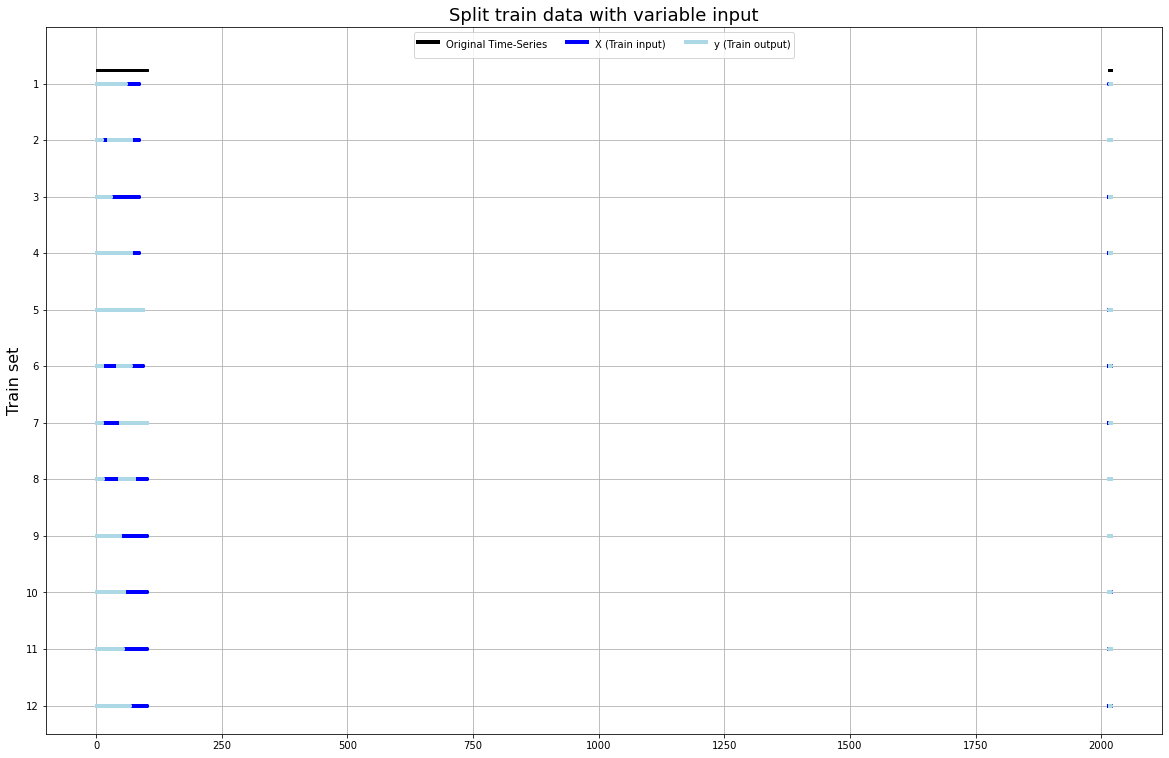

In [73]:
X, y = splitTrain.split_train_variableInput(timeSeriesArray, minSamplesTrain=10, numOutputs=3, numJumps=3)

show_train(X, y, 5)
    
plot_train(X, y, "Split train data with variable input")

--------- SET 1 ---------
X[1] = [0 1 2 3] [2 3 4 5]
y[1] = [4 5 6] [6 7 8]
Xcv[1] = [6 7 8 9]
ycv[1] = [10 11 12]
--------- SET 2 ---------
X[2] = [0 1 2 3] [2 3 4 5] [4 5 6 7]
y[2] = [4 5 6] [6 7 8] [ 8  9 10]
Xcv[2] = [ 8  9 10 11]
ycv[2] = [12 13 14]
--------- SET 3 ---------
X[3] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9]
y[3] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12]
Xcv[3] = [10 11 12 13]
ycv[3] = [14 15 16]
--------- SET 4 ---------
X[4] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [ 8  9 10 11]
y[4] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [12 13 14]
Xcv[4] = [12 13 14 15]
ycv[4] = [16 17 18]
--------- SET 5 ---------
X[5] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [ 8  9 10 11] [10 11 12 13]
y[5] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [12 13 14] [14 15 16]
Xcv[5] = [14 15 16 17]
ycv[5] = [18 19 20]


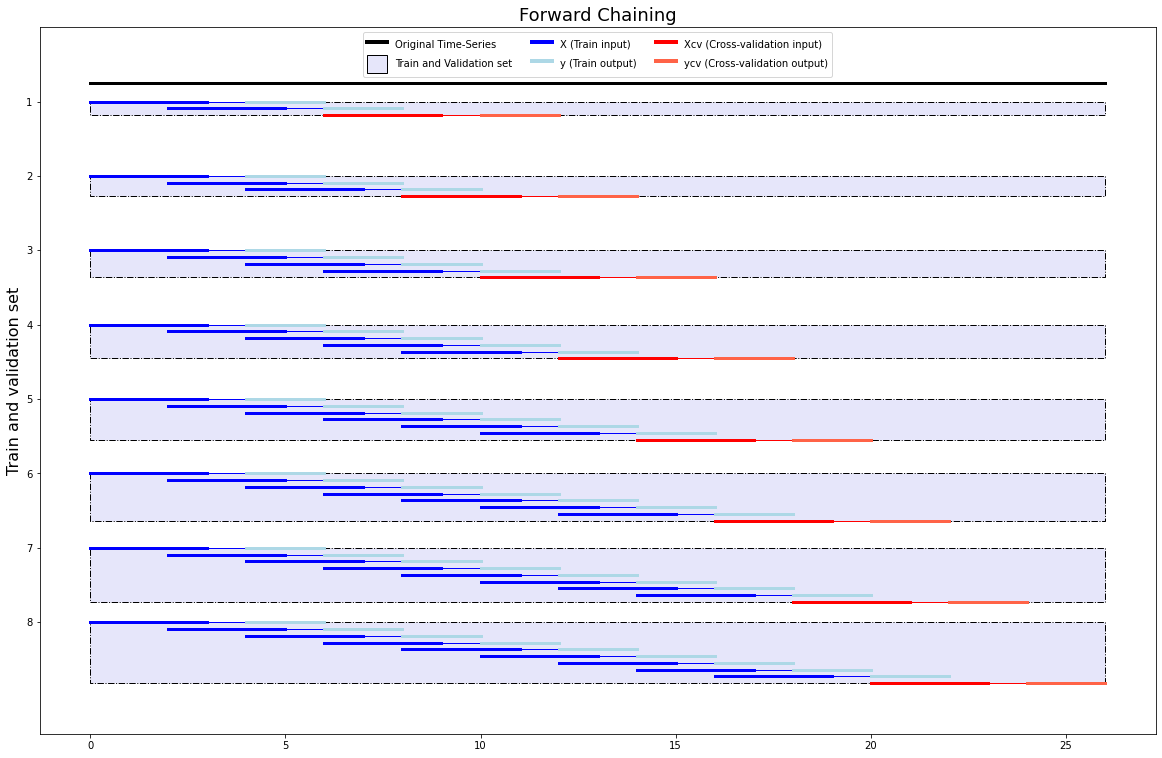

In [42]:
X, y, Xcv, ycv = splitTrainVal.split_train_val_forwardChaining(timeSeries, numInputs=4, numOutputs=3, numJumps=2)

show_train_val(X, y, Xcv, ycv, 5)
    
plot_train_val(X, y, Xcv, ycv, "Forward Chaining")

--------- SET 1 ---------
X[1] = [0 1 2 3] [2 3 4 5] [10 11 12 13] [12 13 14 15] [14 15 16 17] [16 17 18 19] [18 19 20 21] [20 21 22 23]
y[1] = [4 5 6] [6 7 8] [14 15 16] [16 17 18] [18 19 20] [20 21 22] [22 23 24] [24 25 26]
Xcv[1] = [6 7 8 9]
ycv[1] = [10 11 12]
--------- SET 2 ---------
X[2] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [12 13 14 15] [14 15 16 17] [16 17 18 19] [18 19 20 21] [20 21 22 23]
y[2] = [4 5 6] [6 7 8] [ 8  9 10] [16 17 18] [18 19 20] [20 21 22] [22 23 24] [24 25 26]
Xcv[2] = [ 8  9 10 11]
ycv[2] = [12 13 14]
--------- SET 3 ---------
X[3] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [14 15 16 17] [16 17 18 19] [18 19 20 21] [20 21 22 23]
y[3] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [18 19 20] [20 21 22] [22 23 24] [24 25 26]
Xcv[3] = [10 11 12 13]
ycv[3] = [14 15 16]
--------- SET 4 ---------
X[4] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [ 8  9 10 11] [16 17 18 19] [18 19 20 21] [20 21 22 23]
y[4] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [12 13 14] [20 21 22] [22 23 24] [2

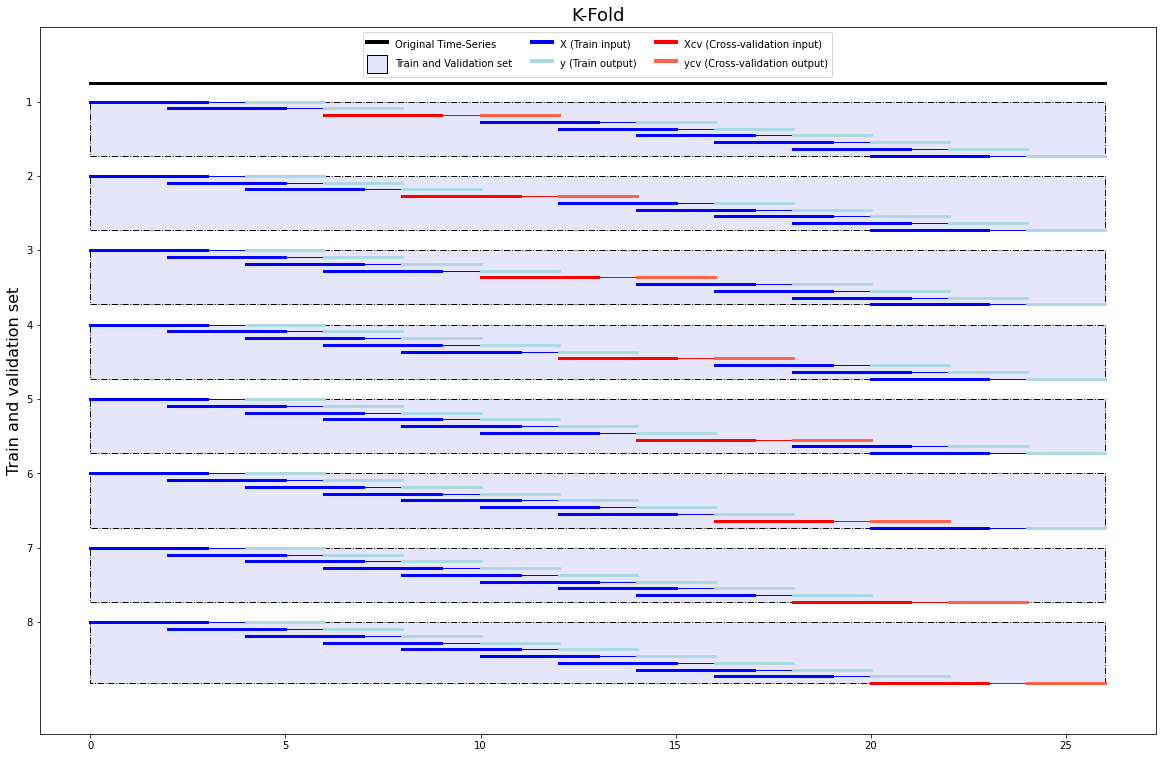

In [43]:
X, y, Xcv, ycv = splitTrainVal.split_train_val_kFold(timeSeries, numInputs=4, numOutputs=3, numJumps=2)

show_train_val(X, y, Xcv, ycv, 5)
    
plot_train_val(X, y, Xcv, ycv, "K-Fold")

--------- SET 1 ---------
X[1] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [14 15 16 17] [16 17 18 19] [18 19 20 21]
y[1] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [18 19 20] [20 21 22] [22 23 24]
Xcv[1] = [10 11 12 13]
ycv[1] = [14 15 16]
--------- SET 2 ---------
X[2] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [12 13 14 15] [14 15 16 17] [16 17 18 19] [18 19 20 21]
y[2] = [4 5 6] [6 7 8] [ 8  9 10] [16 17 18] [18 19 20] [20 21 22] [22 23 24]
Xcv[2] = [ 8  9 10 11]
ycv[2] = [12 13 14]
--------- SET 3 ---------
X[3] = [0 1 2 3] [2 3 4 5] [10 11 12 13] [12 13 14 15] [14 15 16 17] [16 17 18 19]
y[3] = [4 5 6] [6 7 8] [14 15 16] [16 17 18] [18 19 20] [20 21 22]
Xcv[3] = [6 7 8 9] [20 21 22 23]
ycv[3] = [10 11 12] [24 25 26]
--------- SET 4 ---------
X[4] = [0 1 2 3] [ 8  9 10 11] [10 11 12 13] [12 13 14 15] [14 15 16 17]
y[4] = [4 5 6] [12 13 14] [14 15 16] [16 17 18] [18 19 20]
Xcv[4] = [4 5 6 7] [18 19 20 21]
ycv[4] = [ 8  9 10] [22 23 24]
--------- SET 5 ---------
X[5] = [4 5 6 7] [6 7 8 9] [ 8  9 10

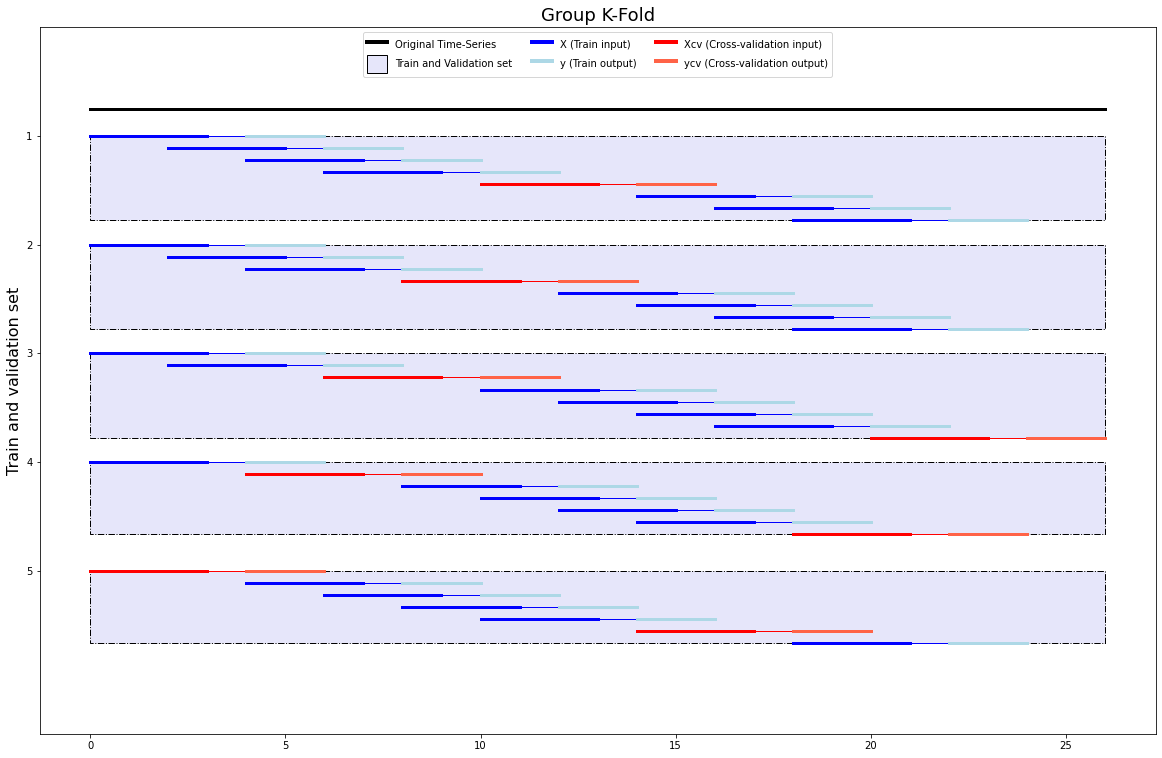

In [44]:
X, y, Xcv, ycv = splitTrainVal.split_train_val_groupKFold(timeSeries, numInputs=4, numOutputs=3, numJumps=2)

show_train_val(X, y, Xcv, ycv, 5)
    
plot_train_val(X, y, Xcv, ycv, "Group K-Fold")

--------- SET 1 ---------
X[1] = [0 1 2 3] [2 3 4 5]
y[1] = [4 5 6] [6 7 8]
Xcv[1] = [6 7 8 9]
ycv[1] = [10 11 12]
Xtest[1] = [10 11 12 13]
ytest[1] = [14 15 16]
--------- SET 2 ---------
X[2] = [0 1 2 3] [2 3 4 5] [4 5 6 7]
y[2] = [4 5 6] [6 7 8] [ 8  9 10]
Xcv[2] = [ 8  9 10 11]
ycv[2] = [12 13 14]
Xtest[2] = [12 13 14 15]
ytest[2] = [16 17 18]
--------- SET 3 ---------
X[3] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9]
y[3] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12]
Xcv[3] = [10 11 12 13]
ycv[3] = [14 15 16]
Xtest[3] = [14 15 16 17]
ytest[3] = [18 19 20]
--------- SET 4 ---------
X[4] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [ 8  9 10 11]
y[4] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [12 13 14]
Xcv[4] = [12 13 14 15]
ycv[4] = [16 17 18]
Xtest[4] = [16 17 18 19]
ytest[4] = [20 21 22]
--------- SET 5 ---------
X[5] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [ 8  9 10 11] [10 11 12 13]
y[5] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [12 13 14] [14 15 16]
Xcv[5] = [14 15 16 17]
ycv[5] = [18 19 20]

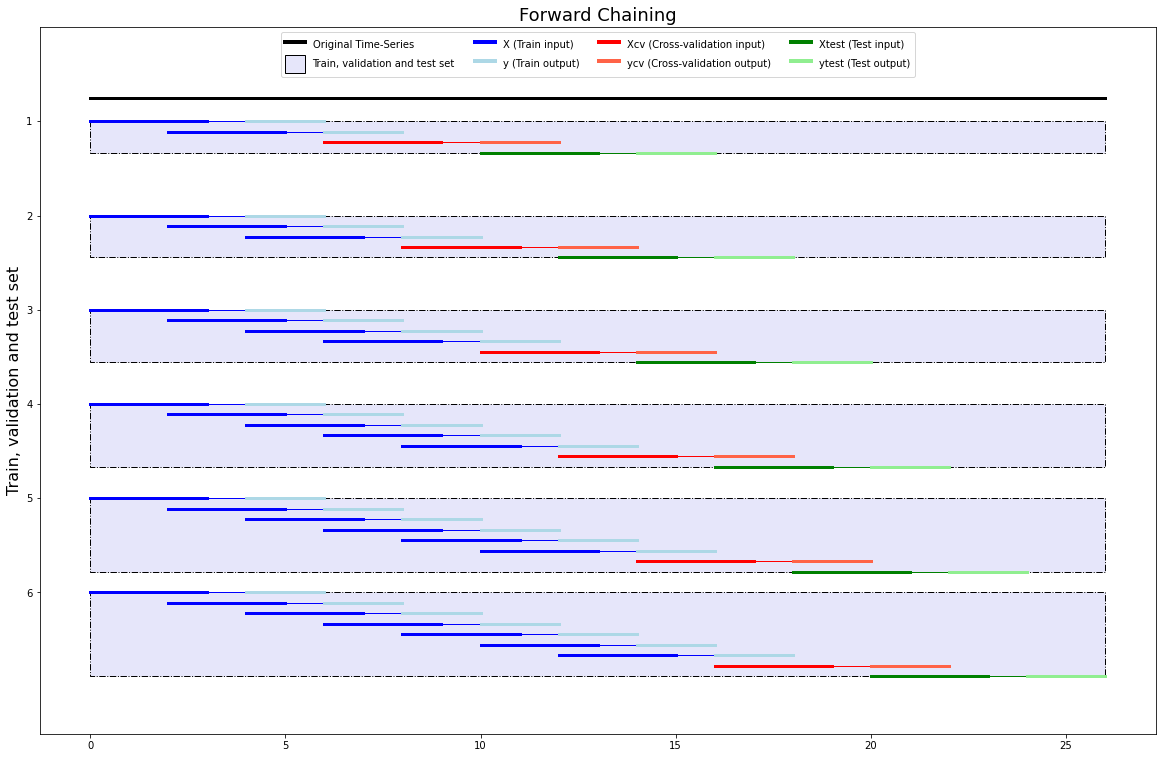

In [45]:
X, y, Xcv, ycv, Xtest, ytest = splitTrainValTest.split_train_val_test_forwardChaining(timeSeries, numInputs=4, numOutputs=3, numJumps=2)

show_train_val_test(X, y, Xcv, ycv, Xtest, ytest, 5)
    
plot_train_val_test(X, y, Xcv, ycv, Xtest, ytest, "Forward Chaining")

--------- SET 1 ---------
X[1] = [0 1 2 3] [2 3 4 5] [14 15 16 17] [16 17 18 19] [18 19 20 21] [20 21 22 23]
y[1] = [4 5 6] [6 7 8] [18 19 20] [20 21 22] [22 23 24] [24 25 26]
Xcv[1] = [6 7 8 9]
ycv[1] = [10 11 12]
Xtest[1] = [10 11 12 13]
ytest[1] = [14 15 16]
--------- SET 2 ---------
X[2] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [16 17 18 19] [18 19 20 21] [20 21 22 23]
y[2] = [4 5 6] [6 7 8] [ 8  9 10] [20 21 22] [22 23 24] [24 25 26]
Xcv[2] = [ 8  9 10 11]
ycv[2] = [12 13 14]
Xtest[2] = [12 13 14 15]
ytest[2] = [16 17 18]
--------- SET 3 ---------
X[3] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [18 19 20 21] [20 21 22 23]
y[3] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [22 23 24] [24 25 26]
Xcv[3] = [10 11 12 13]
ycv[3] = [14 15 16]
Xtest[3] = [14 15 16 17]
ytest[3] = [18 19 20]
--------- SET 4 ---------
X[4] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [ 8  9 10 11] [20 21 22 23]
y[4] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [12 13 14] [24 25 26]
Xcv[4] = [12 13 14 15]
ycv[4] = [16 17 18]
Xtest[4

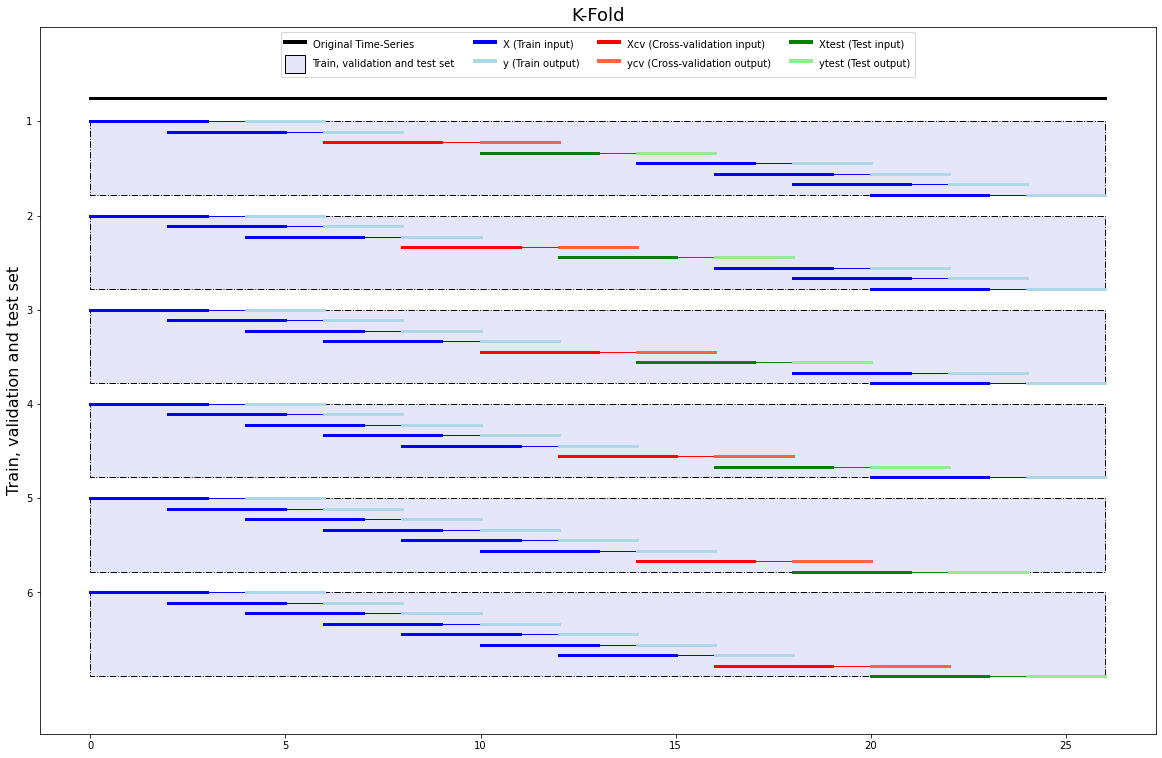

In [46]:
X, y, Xcv, ycv, Xtest, ytest = splitTrainValTest.split_train_val_test_kFold(timeSeries, numInputs=4, numOutputs=3, numJumps=2)

show_train_val_test(X, y, Xcv, ycv, Xtest, ytest, 5)
    
plot_train_val_test(X, y, Xcv, ycv, Xtest, ytest, "K-Fold")

--------- SET 1 ---------
X[1] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [6 7 8 9] [18 19 20 21] [20 21 22 23]
y[1] = [4 5 6] [6 7 8] [ 8  9 10] [10 11 12] [22 23 24] [24 25 26]
Xcv[1] = [10 11 12 13]
ycv[1] = [14 15 16]
Xtest[1] = [14 15 16 17]
ytest[1] = [18 19 20]
--------- SET 2 ---------
X[2] = [0 1 2 3] [2 3 4 5] [4 5 6 7] [16 17 18 19] [18 19 20 21] [20 21 22 23]
y[2] = [4 5 6] [6 7 8] [ 8  9 10] [20 21 22] [22 23 24] [24 25 26]
Xcv[2] = [ 8  9 10 11]
ycv[2] = [12 13 14]
Xtest[2] = [12 13 14 15]
ytest[2] = [16 17 18]
--------- SET 3 ---------
X[3] = [0 1 2 3] [2 3 4 5] [14 15 16 17] [16 17 18 19] [18 19 20 21]
y[3] = [4 5 6] [6 7 8] [18 19 20] [20 21 22] [22 23 24]
Xcv[3] = [6 7 8 9]
ycv[3] = [10 11 12]
Xtest[3] = [10 11 12 13]
ytest[3] = [14 15 16]
--------- SET 4 ---------
X[4] = [0 1 2 3] [12 13 14 15] [14 15 16 17] [16 17 18 19]
y[4] = [4 5 6] [16 17 18] [18 19 20] [20 21 22]
Xcv[4] = [4 5 6 7] [20 21 22 23]
ycv[4] = [ 8  9 10] [24 25 26]
Xtest[4] = [ 8  9 10 11]
ytest[4] = [12 13 14]

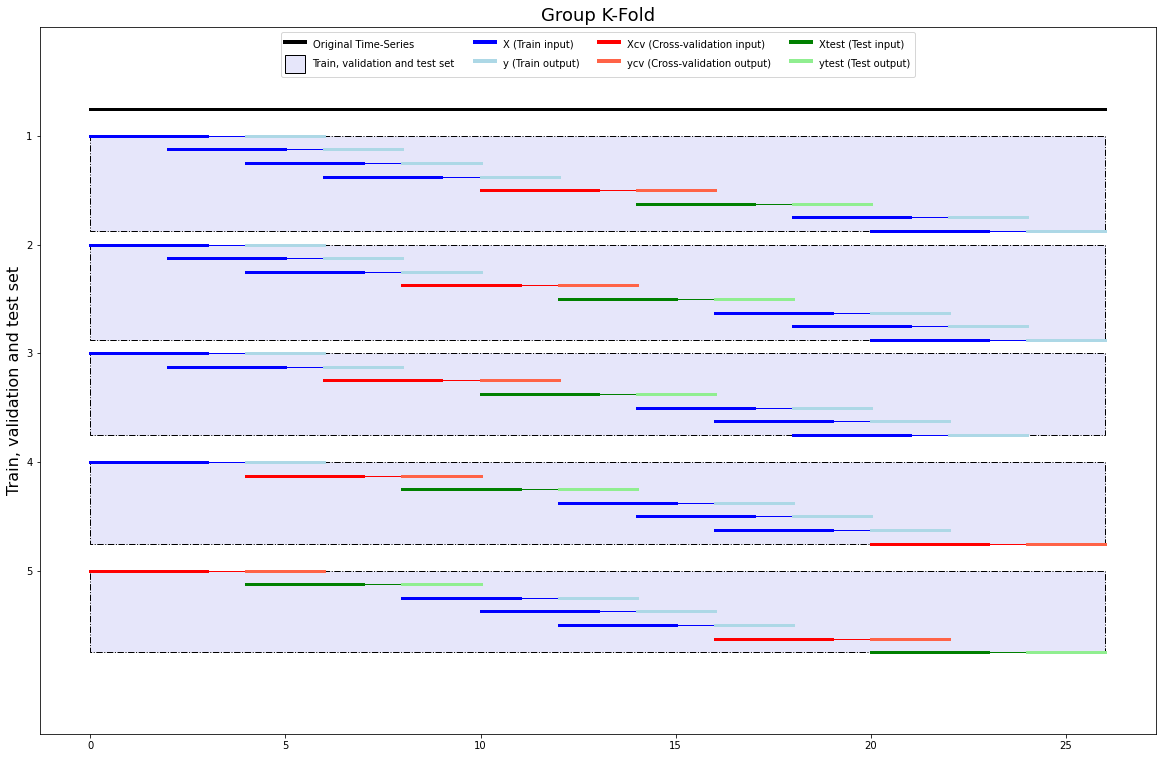

In [47]:
X, y, Xcv, ycv, Xtest, ytest = splitTrainValTest.split_train_val_test_groupKFold(timeSeries, numInputs=4, numOutputs=3, numJumps=2)

show_train_val_test(X, y, Xcv, ycv, Xtest, ytest, 5)
    
plot_train_val_test(X, y, Xcv, ycv, Xtest, ytest, "Group K-Fold")